# Implementing the Random Walk Laplacian
Because of the problems with increasing the in-degree of a graph, we introduce the random walk laplacian into our model to counteract these effects.

This contains:
- A few trees
- An attempt to blow up
- Chains
- Consolidators
- Splitters
- Example of spectral radius increasing, decreasing and staying the same

In [1]:
import numpy as np
from specializeGraph import *
from scipy import linalg as la

In [2]:
def normL(A):
    return laplacian(A,randomWalk=True)

In [3]:
def compareSpect(A,base):
    drawGraph(A)
    L = normL(A)
    print("Spectral Radii\n--------------")
    print("A: "+ str(spectralRad(A)))
    print("L: "+ str(spectralRad(L)))
    print("\nMax in-degree\n--------------")
    print(str(np.max(A.sum(axis=1))))
    print("Random Walk Laplacian eigenvalues:")
    print(np.round(np.linalg.eig(normL(A))[0],3))
    
    sA = specializeGraph(A,base)
    drawGraph(sA)
    sL = normL(sA)
    print("Specialized spectral Radii\n-----------------------")
    print("sA: "+str(spectralRad(sA)))
    print("sL: "+str(spectralRad(sL)))
    print("\nSpecialized max in-degree\n------------------------")
    print(str(np.max(sA.sum(axis=1))))
    print("Specialized Random Walk Laplacian eigenvalues:")
    print(np.round(np.linalg.eig(normL(sA))[0],3))

### Tree

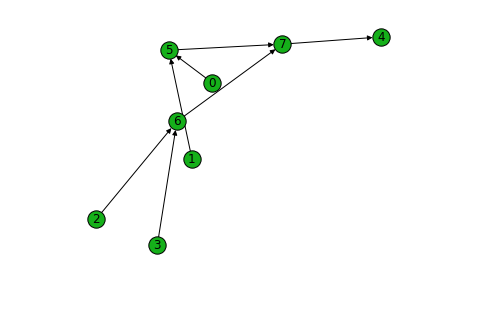

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
2.0
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1.]


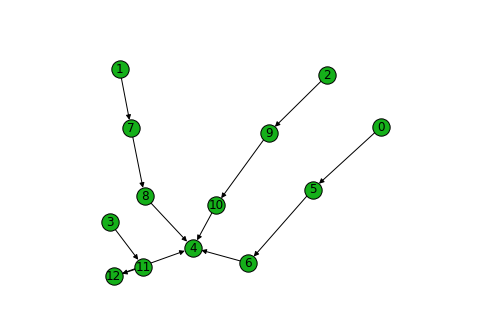

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
4.0
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
A = np.zeros((8,8))

A[4:,:] = np.array([[0,0,0,0,0,0,0,1],
                    [1,1,0,0,0,0,0,0],
                    [0,0,1,1,0,0,0,0],
                    [0,0,0,0,0,1,1,0],
                   ])

compareSpect(A,[0,1,2,3,4])


### Strongly Connected Version of the Graph Above

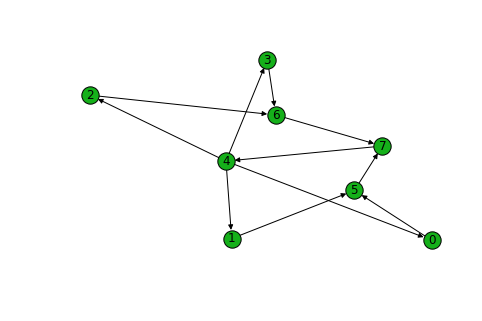

Spectral Radii
--------------
A: (1.4142135623730951+0j)
L: (2.0000000000000013+0j)

Max in-degree
--------------
2.0
Random Walk Laplacian eigenvalues:
[-0.+0.j  1.+1.j  1.-1.j  2.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]


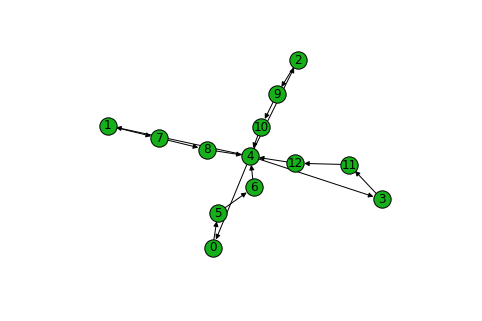

Specialized spectral Radii
-----------------------
sA: (1.4142135623730954+0j)
sL: (2+0j)

Specialized max in-degree
------------------------
4.0
Specialized Random Walk Laplacian eigenvalues:
[-0.+0.j  1.+1.j  1.-1.j  2.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.-0.j  1.+0.j  1.+0.j  1.-0.j]


In [5]:
A = np.zeros((8,8))
A[:4,4] = np.ones(4)
A[4:,:] = np.array([[0,0,0,0,0,0,0,1],
                    [1,1,0,0,0,0,0,0],
                    [0,0,1,1,0,0,0,0],
                    [0,0,0,0,0,1,1,0],
                   ])

compareSpect(A,[0,1,2,3,4])

### Smaller version of the Tree Graph
(Less nodes)

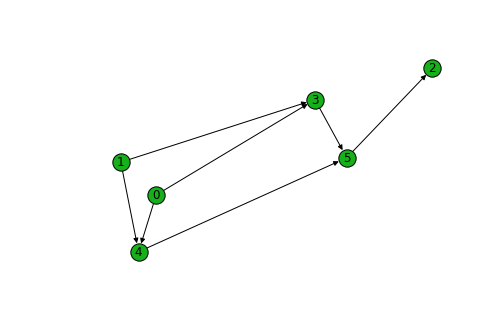

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
2
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1.]


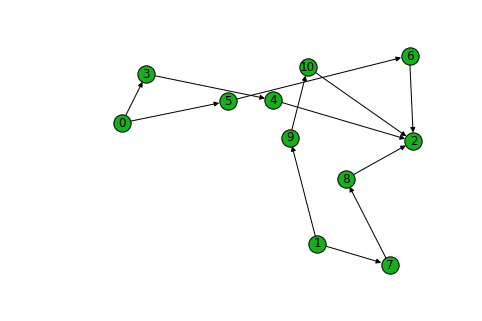

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
4
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
e = [(0,3),(0,4),(1,3),(1,4),(3,5),(4,5),(5,2)]
A = nx.adj_matrix(nx.DiGraph(e)).toarray().T

compareSpect(A,[0,1,2])

### Attempt to blow up the spectral radius

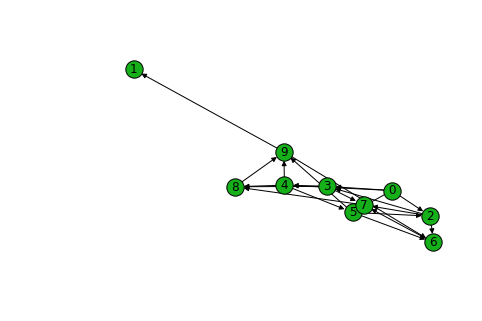

Spectral Radii
--------------
A: (1.0000000000000004+0j)
L: (1.5000000000000007+0j)

Max in-degree
--------------
3.0
Random Walk Laplacian eigenvalues:
[1.   +0.j    0.667+0.j    1.   +0.333j 1.   -0.333j 1.333+0.j
 0.5  +0.j    1.   +0.5j   1.   -0.5j   1.5  +0.j    1.   +0.j   ]


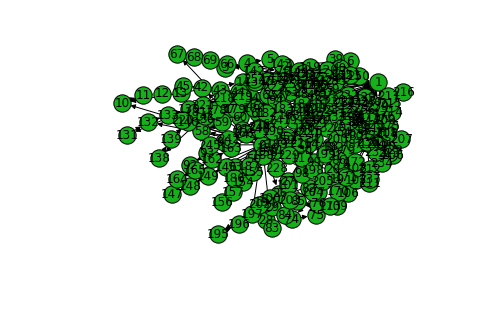

Specialized spectral Radii
-----------------------
sA: (1.0000000183541093+0j)
sL: (1.840896434934405+0j)

Specialized max in-degree
------------------------
32.0
Specialized Random Walk Laplacian eigenvalues:
[1.   +0.j    0.159+0.j    1.   +0.841j 1.   -0.841j 1.841+0.j
 1.841+0.j    1.841-0.j    1.   +0.841j 1.   -0.841j 1.   +0.841j
 1.   -0.841j 1.   +0.841j 1.   -0.841j 1.   +0.841j 1.   -0.841j
 1.   +0.841j 1.   -0.841j 1.841+0.j    1.841+0.j    1.841+0.j
 1.841+0.j    1.841+0.j    1.841+0.j    1.841-0.j    1.841+0.j
 1.841-0.j    1.841+0.j    1.841-0.j    1.841+0.j    1.841-0.j
 1.841+0.j    1.841-0.j    1.841+0.j    1.841+0.j    1.841+0.j
 1.841-0.j    1.841+0.j    1.841-0.j    1.841+0.j    1.841-0.j
 1.841+0.j    1.841-0.j    1.   +0.841j 1.   -0.841j 1.   +0.841j
 1.   -0.841j 1.   +0.841j 1.   -0.841j 1.   +0.841j 1.   -0.841j
 1.841+0.j    1.841+0.j    1.841-0.j    1.   +0.841j 1.   -0.841j
 1.   +0.841j 1.   -0.841j 1.841+0.j    1.841+0.j    1.841-0.j
 1.   +0.841j 1.   

In [7]:
A = np.zeros((10,10))
C1 = np.array([[0,0,0,1],
               [1,0,0,0],
               [0,1,0,0],
               [0,0,1,0]
              ])
A[2:6,2:6] = C1
A[6:10,6:10] = C1
A[2:6,0] = np.ones(4)

links = np.array([[1,0,0,1],
                  [1,1,0,0],
                  [0,1,1,0],
                  [0,0,1,1],
                 ])

A[6:10,2:6] = links
A[1,9] = 1

compareSpect(A,[0,1])

## Determining when the Laplacian's radius increases

### Split signal

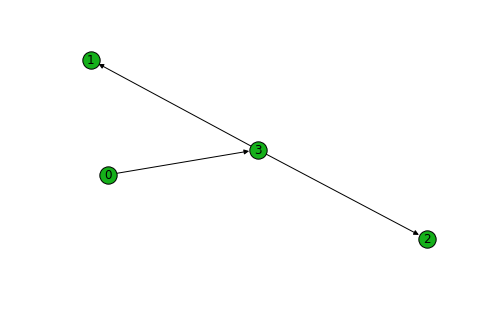

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
1
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1.]


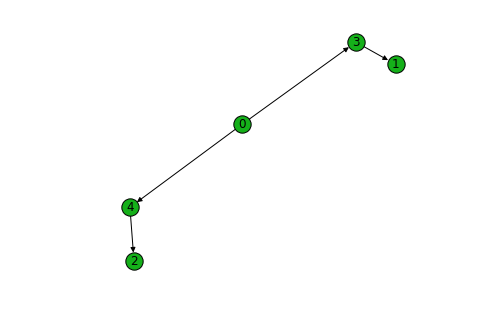

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
1
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1.]


In [8]:
A = np.array([[0,0,0,0],
              [0,0,0,1],
              [0,0,0,1],
              [1,0,0,0]
             ])

compareSpect(A,[0,1,2])

### Consolidate Signal

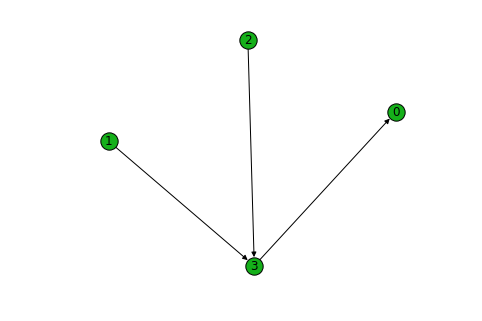

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
2
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1.]


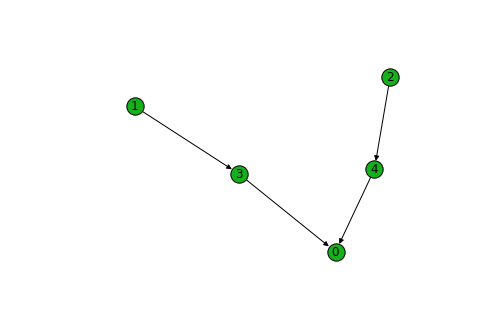

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
2
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1.]


In [9]:
A = np.array([[0,0,0,1],
              [0,0,0,0],
              [0,0,0,0],
              [0,1,1,0]
             ])

compareSpect(A,[0,1,2])

### Consolidate and Split (2 in 2 out)

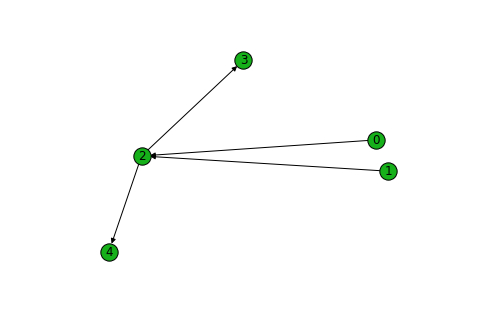

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
2
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1.]


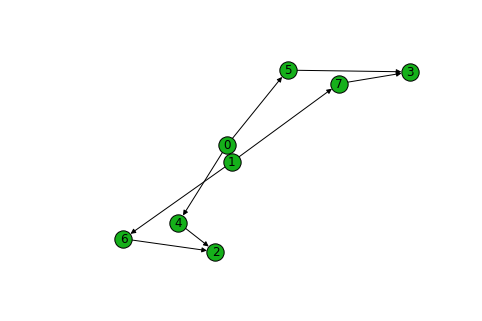

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
2
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
e = [(0,2),(1,2),(2,3),(2,4)]
A = nx.adj_matrix(nx.DiGraph(e)).toarray().T

compareSpect(A,[0,1,3,4])

### Consolidate and Split (3 in 3 out)

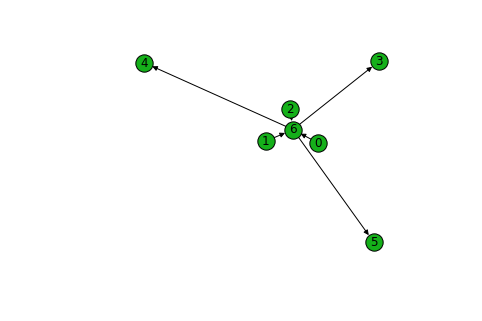

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
3.0
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1.]


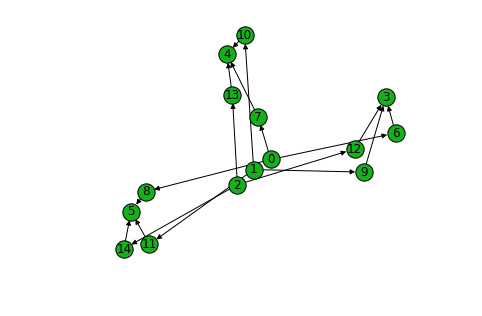

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
3.0
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
n = 7

A = np.zeros((n,n))

A[6:n,:3] = np.array([[1,1,1]])
A[3:6,6:n] = np.array([[1],[1],[1]])

compareSpect(A,[0,1,2,3,4,5])

### Example of Normalized Laplacian Spectral Radius Decreasing

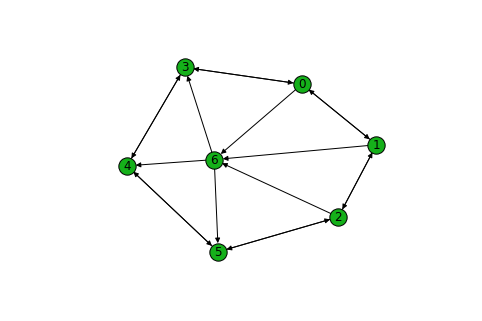

Spectral Radii
--------------
A: (2.440696074105502+0j)
L: (1.8351707457921898+0j)

Max in-degree
--------------
3.0
Random Walk Laplacian eigenvalues:
[0.   +0.j    1.835+0.j    0.592+0.j    0.89 +0.214j 0.89 -0.214j
 1.408+0.j    1.384+0.j   ]


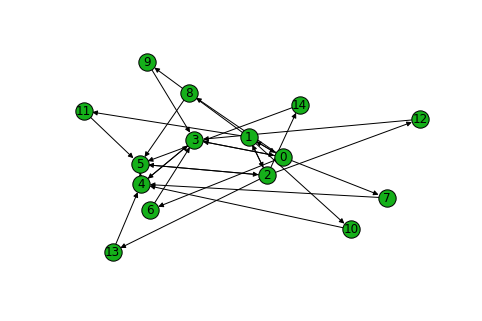

Specialized spectral Radii
-----------------------
sA: (2.440696074105503+0j)
sL: (1.736718032301442+0j)

Specialized max in-degree
------------------------
5.0
Specialized Random Walk Laplacian eigenvalues:
[0.   +0.j    1.737+0.j    0.684+0.j    1.017+0.344j 1.017-0.344j
 1.316+0.j    1.23 +0.j    1.   +0.j    1.   +0.j    1.   +0.j
 1.   +0.j    1.   +0.j    1.   +0.j    1.   +0.j    1.   +0.j   ]


In [12]:
B = np.array([[0,1,0,1,0,0],
              [1,0,1,0,0,0],
              [0,1,0,0,0,1],
              [1,0,0,0,1,0],
              [0,0,0,1,0,1],
              [0,0,1,0,1,0]])

n = 7

A = np.zeros((n,n))
A[:6,:6] = B

A[6:n,:3] = np.array([[1,1,1]])
A[3:6,6:n] = np.array([[1],[1],[1]])

compareSpect(A,[0,1,2,3,4,5])

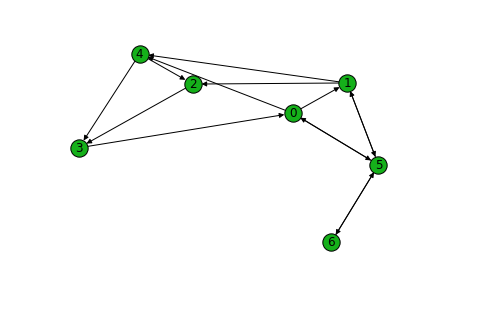

Spectral Radii
--------------
A: (2.1296567862171196+0j)
L: (1.7333775825267284+0j)

Max in-degree
--------------
3
Random Walk Laplacian eigenvalues:
[-0.   +0.j     1.025+0.591j  1.025-0.591j  0.54 +0.j     1.733+0.j
  1.5  +0.j     1.176+0.j   ]


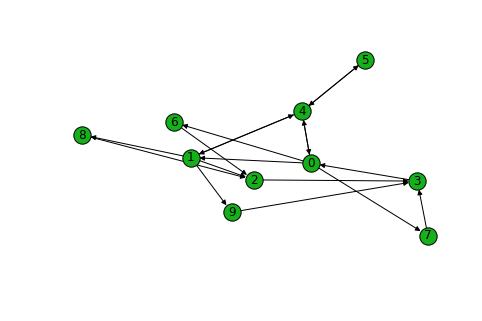

Specialized spectral Radii
-----------------------
sA: (2.1296567862171227+0j)
sL: (1.7305417930864082+0j)

Specialized max in-degree
------------------------
3
Specialized Random Walk Laplacian eigenvalues:
[0.   +0.j    0.531+0.j    1.061+0.566j 1.061-0.566j 1.731+0.j
 1.416+0.j    1.201+0.j    1.   +0.j    1.   +0.j    1.   +0.j   ]


In [13]:
B = np.array([[0,0,0,1,0,1,0],
              [1,0,0,0,0,1,0],
              [0,1,0,0,1,0,0],
              [0,0,1,0,1,0,0],
              [1,1,0,0,0,0,0],
              [1,1,0,0,0,0,1],
              [0,0,0,0,0,1,0],
             ])
compareSpect(B,[0,1,2,3,5,6])

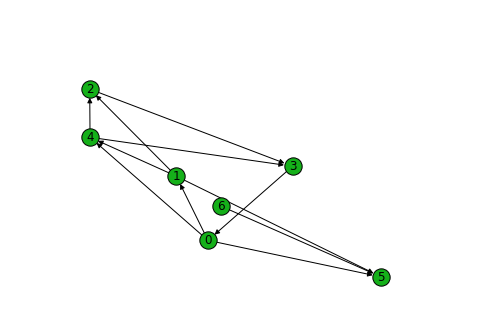

Spectral Radii
--------------
A: (1.5079819785024937+0j)
L: (1.7217575960144285+0j)

Max in-degree
--------------
3
Random Walk Laplacian eigenvalues:
[1.   +0.j    0.   +0.j    1.029+0.886j 1.029-0.886j 1.722+0.j
 1.22 +0.j    1.   +0.j   ]


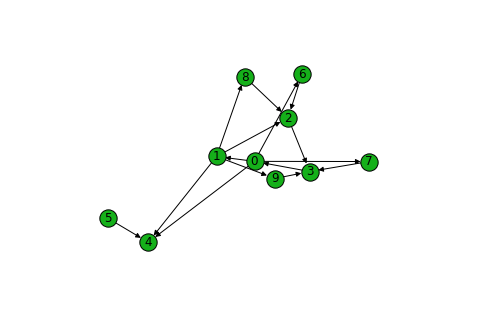

Specialized spectral Radii
-----------------------
sA: (1.5079819785024926+0j)
sL: (1.6407538996372313+0j)

Specialized max in-degree
------------------------
3
Specialized Random Walk Laplacian eigenvalues:
[1.   +0.j    0.   +0.j    1.063+0.858j 1.063-0.858j 1.641+0.j
 1.   +0.j    1.234+0.j    1.   +0.j    1.   +0.j    1.   +0.j   ]


In [14]:
B = np.array([[0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0],
              [0,1,0,0,1,0,0],
              [0,0,1,0,1,0,0],
              [1,1,0,0,0,0,0],
              [1,1,0,0,0,0,1],
              [0,0,0,0,0,0,0],
             ])
compareSpect(B,[0,1,2,3,5,6])

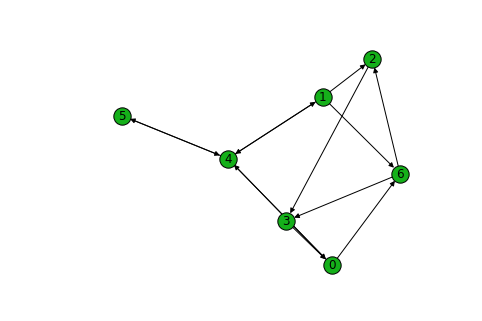

Spectral Radii
--------------
A: (1.9275619754829216+0j)
L: (1.8566813938984177+0j)

Max in-degree
--------------
3
Random Walk Laplacian eigenvalues:
[0.   +0.j    1.857+0.j    1.411+0.j    1.034+0.419j 1.034-0.419j
 0.665+0.j    1.   +0.j   ]


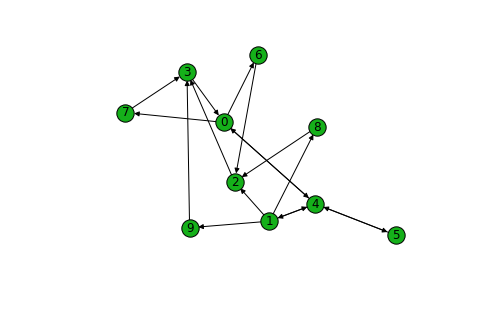

Specialized spectral Radii
-----------------------
sA: (1.9275619754829276+0j)
sL: (1.8596649998745374+0j)

Specialized max in-degree
------------------------
3
Specialized Random Walk Laplacian eigenvalues:
[-0.   +0.j     1.86 +0.j     0.615+0.j     1.108+0.412j  1.108-0.412j
  1.309+0.j     1.   +0.j     1.   -0.j     1.   +0.j     1.   +0.j   ]


In [15]:
B = np.array([[0,0,0,1,1,0,0],
              [0,0,0,0,1,0,0],
              [0,1,0,0,0,0,1],
              [0,0,1,0,0,0,1],
              [1,1,0,0,0,1,0],
              [0,0,0,0,1,0,0],
              [1,1,0,0,0,0,0],
             ])
compareSpect(B,[0,1,2,3,4,5])


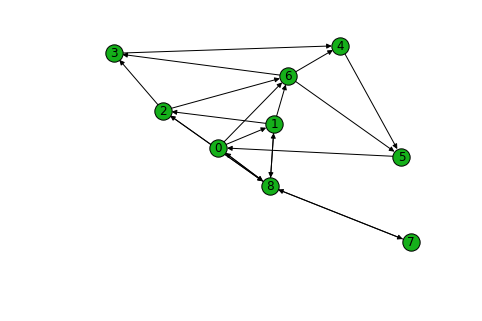

Spectral Radii
--------------
A: (2.432976345864544+0j)
L: (1.7009293687530038+0j)

Max in-degree
--------------
4
Random Walk Laplacian eigenvalues:
[-0.   +0.j     0.8  +0.475j  0.8  -0.475j  0.6  +0.j     1.25 +0.433j
  1.25 -0.433j  1.701+0.j     1.441+0.j     1.158+0.j   ]


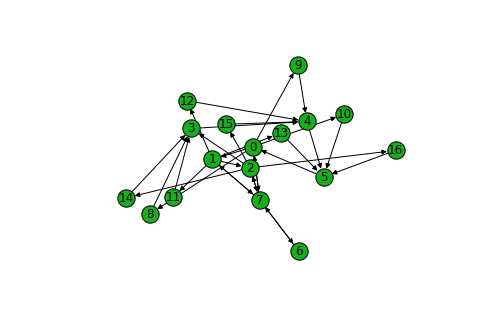

Specialized spectral Radii
-----------------------
sA: (2.432976345864554+0j)
sL: (1.6772041522583427+0j)

Specialized max in-degree
------------------------
4
Specialized Random Walk Laplacian eigenvalues:
[-0.   +0.j     0.587+0.j     0.933+0.446j  0.933-0.446j  1.677+0.j
  1.192+0.263j  1.192-0.263j  1.242+0.15j   1.242-0.15j   1.   +0.j
  1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
  1.   +0.j     1.   +0.j   ]


In [16]:
B = np.array([[0,0,0,0,0,1,0,0,1],
              [1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,1,0,0],
              [0,0,0,1,0,0,1,0,0],
              [0,0,0,0,1,0,1,0,0],
              [1,1,1,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,1],
              [1,1,1,0,0,0,0,1,0],
             ])
compareSpect(B,[0,1,2,3,4,5,7,8])

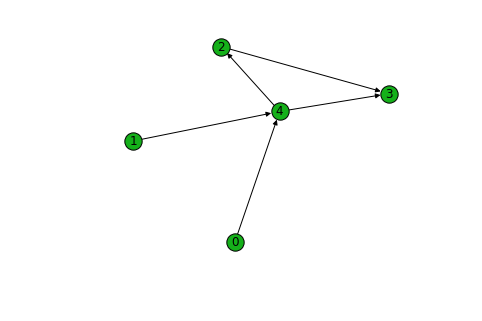

Spectral Radii
--------------
A: 0.0
L: 1.0

Max in-degree
--------------
2
Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1.]


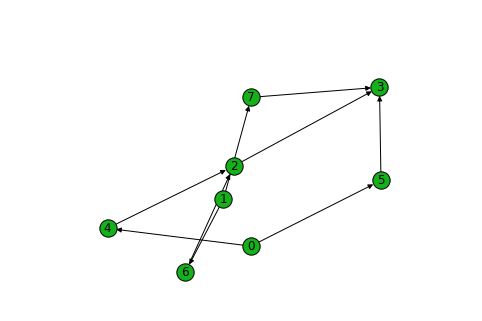

Specialized spectral Radii
-----------------------
sA: 0.0
sL: 1.0

Specialized max in-degree
------------------------
3
Specialized Random Walk Laplacian eigenvalues:
[1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
B = np.array([[0,0,0,0,0],
              [0,0,0,0,0],
              [0,0,0,0,1],
              [0,0,1,0,1],
              [1,1,0,0,0],

             ])
compareSpect(B,[0,1,2,3])

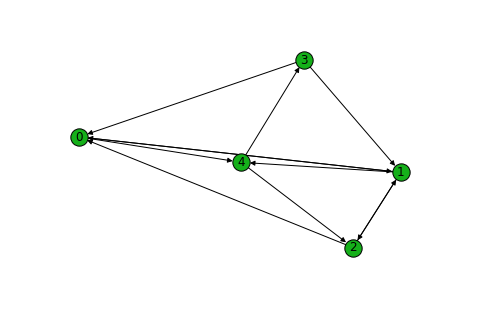

Spectral Radii
--------------
A: (2.2418965630344805+0j)
L: (1.4719601443879728+0j)

Max in-degree
--------------
3
Random Walk Laplacian eigenvalues:
[0.   +0.j    1.333+0.624j 1.333-0.624j 1.333+0.j    1.   +0.j   ]


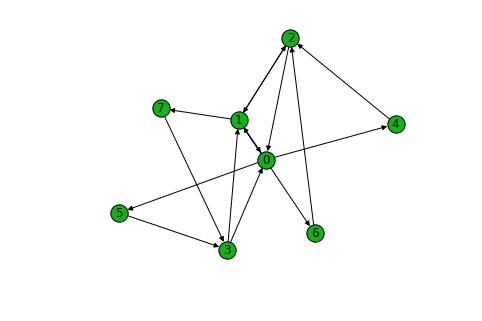

Specialized spectral Radii
-----------------------
sA: (2.241896563034479+0j)
sL: (1.4907119849998582+0j)

Specialized max in-degree
------------------------
3
Specialized Random Walk Laplacian eigenvalues:
[0.   +0.j    1.333+0.667j 1.333-0.667j 1.333+0.j    1.   +0.j
 1.   +0.j    1.   +0.j    1.   +0.j   ]


In [18]:
B = np.array([[0,1,1,1,0],
              [1,0,1,1,0],
              [0,1,0,0,1],
              [0,0,0,0,1],
              [1,1,0,0,0],

             ])
compareSpect(B,[0,1,2,3])